In [18]:
import math
import pandas as pd
import numpy as np
import requests

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error

import lightgbm
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

#Models package
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("C:\\Users\\13996\\PycharmProjects\\AMS518\\House Pricing\\house-prices-advanced-regression-techniques\\train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train = df.drop("Id",axis=1)

In [5]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Data Cleaning

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
checknull = train.isnull().sum()
null = []
for col, count in checknull.items():
    if count > 0:
        null.append(col)
null

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [8]:
for n in null:
    print(str(n) + str(": ") + str(train[n].unique()))

LotFrontage: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Alley: [nan 'Grvl' 'Pave']
MasVnrType: ['BrkFace' nan 'Stone' 'BrkCmn']
MasVnrArea: [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.60

In [9]:
train['LotFrontage'].fillna(train['LotFrontage'].mode()[0],inplace=True)
train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0],inplace=True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mode()[0],inplace=True)

C:\Users\13996\AppData\Local\Temp\ipykernel_27680\797677035.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['LotFrontage'].fillna(train['LotFrontage'].mode()[0],inplace=True)
C:\Users\13996\AppData\Local\Temp\ipykernel_27680\797677035.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

### Change objects to numerical

In [10]:
le = LabelEncoder()
char = []
for col in train.columns:
    if train[col].dtype == 'object':
        char.append(col)
        
for c in char:  
    train[c] = le.fit_transform(train[c])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int32  
 5   Alley          1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Checking the data infor 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Users\13996\AppData\Local\Temp\ipykernel_27680\3551209751.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], bins=100, hist_kws={'alpha':0.4})


<Axes: xlabel='SalePrice', ylabel='Density'>

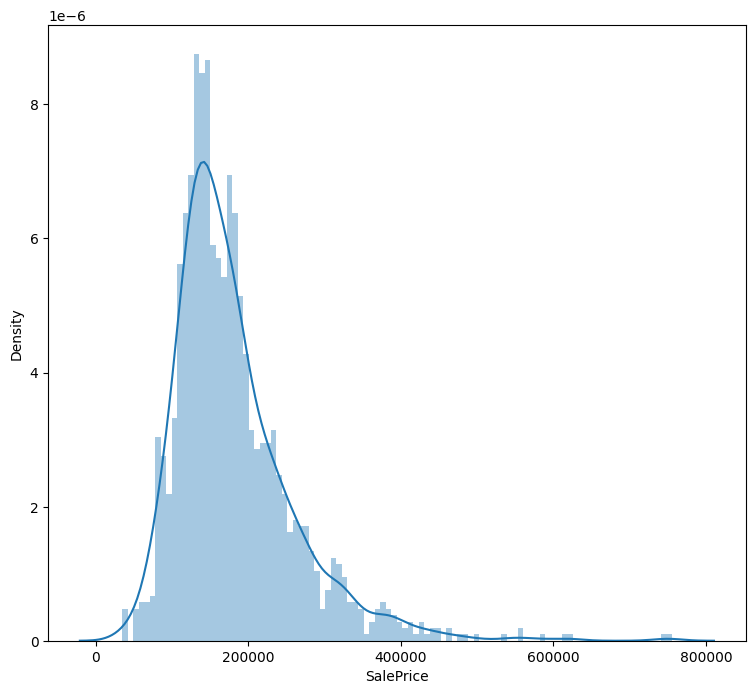

In [11]:
print(train['SalePrice'].describe())
plt.figure(figsize=(9,8))
sns.distplot(train['SalePrice'], bins=100, hist_kws={'alpha':0.4})

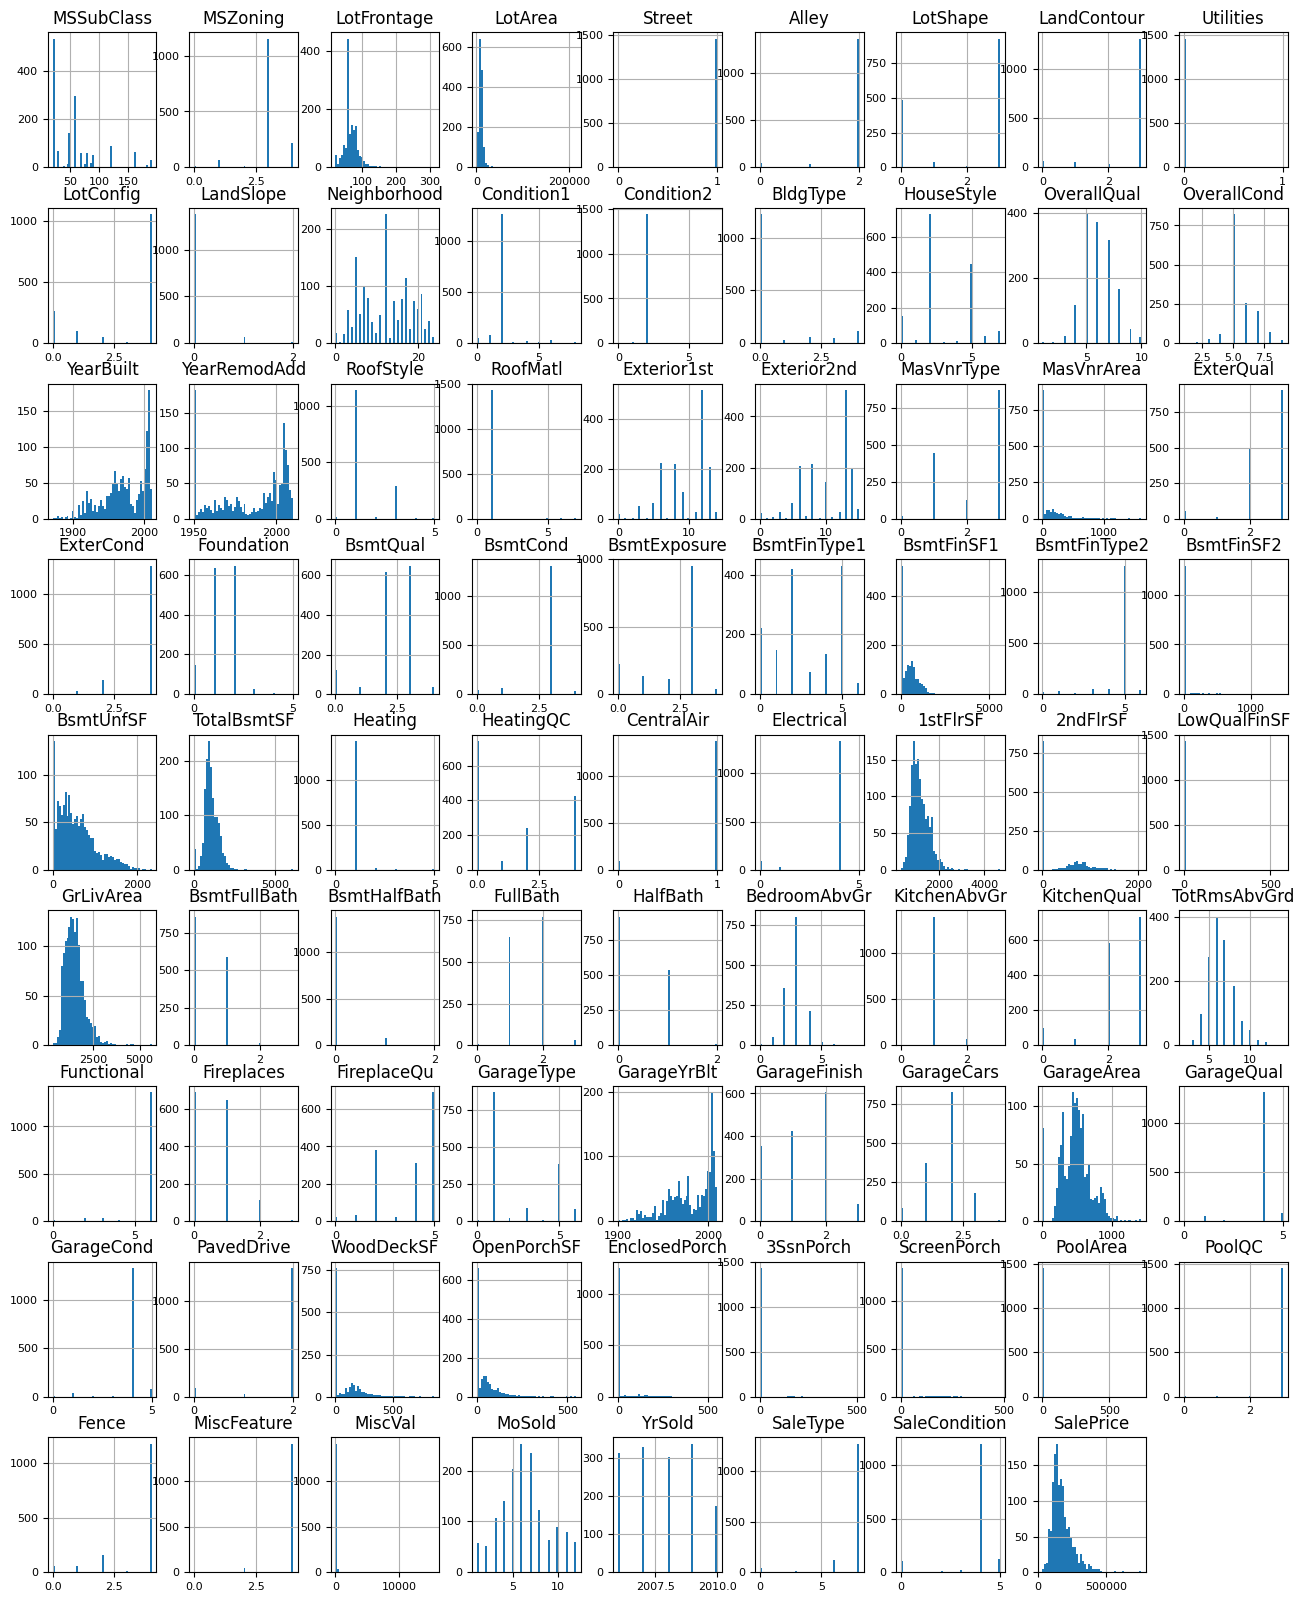

In [12]:
train_num = train.select_dtypes(include = ['float64', 'int64','int32'])
train_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

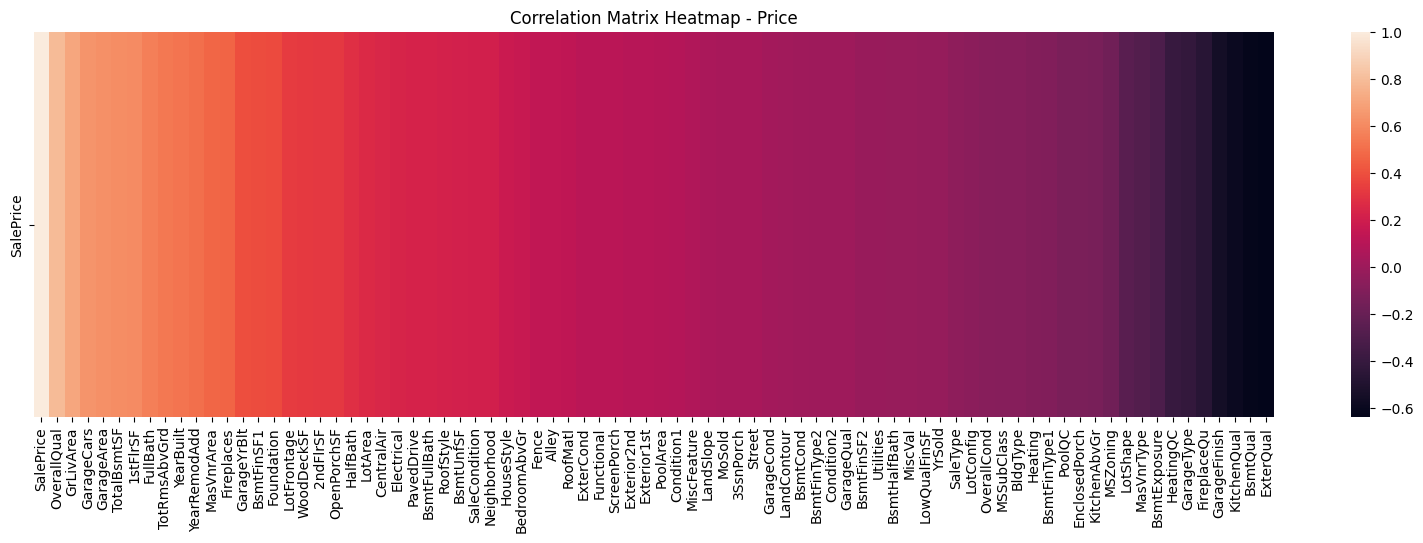

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,LotShape,MasVnrType,BsmtExposure,HeatingQC,GarageType,FireplaceQu,GarageFinish,KitchenQual,BsmtQual,ExterQual
SalePrice,1.0,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,...,-0.25558,-0.281554,-0.309043,-0.400178,-0.415283,-0.459605,-0.549247,-0.589189,-0.620886,-0.636884


In [30]:
#Plot the HeatMap
corr = train.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
corr = corr.to_frame().T 
plt.figure(figsize=(20,5))
sns.heatmap(corr)
plt.title('Correlation Matrix Heatmap - Price')
plt.show()
corr

In [31]:
good_features = []
n = 0
for c in corr:
    if n < 11:
        good_features.append(c)
        n += 1
    else:
        break
        
good_features

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

In [32]:
train_data = pd.get_dummies(train[good_features])
train_data

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,208500,7,1710,2,548,856,856,2,8,2003,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976
2,223500,7,1786,2,608,920,920,2,6,2001,2002
3,140000,7,1717,3,642,756,961,1,7,1915,1970
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999,2000
1456,210000,6,2073,2,500,1542,2073,2,7,1978,1988
1457,266500,7,2340,1,252,1152,1188,2,9,1941,2006
1458,142125,5,1078,1,240,1078,1078,1,5,1950,1996


In [42]:
X = train_data.drop(['SalePrice'], axis=1)
y = train_data['SalePrice']
X

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2,548,856,856,2,8,2003,2003
1,6,1262,2,460,1262,1262,2,6,1976,1976
2,7,1786,2,608,920,920,2,6,2001,2002
3,7,1717,3,642,756,961,1,7,1915,1970
4,8,2198,3,836,1145,1145,2,9,2000,2000
...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999,2000
1456,6,2073,2,500,1542,2073,2,7,1978,1988
1457,7,2340,1,252,1152,1188,2,9,1941,2006
1458,5,1078,1,240,1078,1078,1,5,1950,1996


### Testing Data

In [16]:
df1 = pd.read_csv("C:\\Users\\13996\\PycharmProjects\\AMS518\\House Pricing\\house-prices-advanced-regression-techniques\\test.csv")
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [43]:
features_test = good_features[1:11]
test = df1.drop('Id',axis=1)
test_data = pd.get_dummies(test[features_test])
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   GrLivArea     1459 non-null   int64  
 2   GarageCars    1458 non-null   float64
 3   GarageArea    1458 non-null   float64
 4   TotalBsmtSF   1458 non-null   float64
 5   1stFlrSF      1459 non-null   int64  
 6   FullBath      1459 non-null   int64  
 7   TotRmsAbvGrd  1459 non-null   int64  
 8   YearBuilt     1459 non-null   int64  
 9   YearRemodAdd  1459 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 114.1 KB


In [46]:
checkmissing_test = test_data.isnull().sum()
checkmissing_test

OverallQual     0
GrLivArea       0
GarageCars      1
GarageArea      1
TotalBsmtSF     1
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [49]:
#fill the null with mode() for all three features
test_data['GarageCars'].fillna(test_data['GarageCars'].mode()[0],inplace=True)
test_data['GarageArea'].fillna(test_data['GarageArea'].mode()[0],inplace=True)
test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].mode()[0],inplace=True)

C:\Users\13996\AppData\Local\Temp\ipykernel_27680\1822855329.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['GarageCars'].fillna(test_data['GarageCars'].mode()[0],inplace=True)
C:\Users\13996\AppData\Local\Temp\ipykernel_27680\1822855329.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [50]:
checkmissing_test = test_data.isnull().sum()
checkmissing_test

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
dtype: int64

### Method 1: Linera Regression

In [69]:
linear_model = LinearRegression()
linear_model.fit(X,y)

y_fit = linear_model.predict(X)
l_train_mse = mean_squared_error(y, y_fit)
print("MSE_Train: ",l_train_mse)

lrpred = linear_model.predict(test_data)

output = pd.DataFrame({'id': df1.Id, 'SalePrice': lrpred})
output.to_csv('lrsubmission.csv', index=False)
print("Your submission was successfully saved!")

MSE_Train:  1427271411.7217536
Your submission was successfully saved!


### Method 2: LASSO Regression

In [70]:
lasso_model = Lasso()
lasso_model.fit(X,y)

y_fit = lasso_model.predict(X)
la_train_mse = mean_squared_error(y, y_fit)
print("LASSO_MSE_Train: ", la_train_mse)

lapred = lasso_model.predict(test_data)

output = pd.DataFrame({'id': df1.Id, 'SalePrice': lapred})
output.to_csv('lasubmission.csv', index=False)
print("Your submission was successfully saved!")

LASSO_MSE_Train:  1427271432.2355256
Your submission was successfully saved!


### Method 3: Elastic Net Regression

In [71]:
elastic_model = ElasticNet()
elastic_model.fit(X,y)

y_fit = elastic_model.predict(X)
el_train_mse = mean_squared_error(y, y_fit)
print("Elastic Net_MSE_Train: ", el_train_mse)

elpred = elastic_model.predict(test_data)

output = pd.DataFrame({'id': df1.Id, 'SalePrice': elpred})
output.to_csv('elsubmission.csv', index=False)
print("Your submission was successfully saved!")

Elastic Net_MSE_Train:  1485879283.9213736
Your submission was successfully saved!


### Method 4: Kernel Ridage Regression

In [72]:
kernel_model = KernelRidge()
kernel_model.fit(X,y)

y_fit = kernel_model.predict(X)
ker_train_mse = mean_squared_error(y, y_fit)
print("Kernel Ridage_MSE_Train: ", ker_train_mse)

kpred = kernel_model.predict(test_data)

output = pd.DataFrame({'id': df1.Id, 'SalePrice': kpred})
output.to_csv('kersubmission.csv', index=False)
print("Your submission was successfully saved!")

Kernel Ridage_MSE_Train:  1510408345.8909802
Your submission was successfully saved!


### Method 5: Gradient Boosting Regression

In [76]:
grad_model =  GradientBoostingRegressor()
grad_model.fit(X,y)
y_fit = grad_model.predict(X)
gr_train_mse = mean_squared_error(y, y_fit)
print("Gradient Boosting_MSE_Train: ", gr_train_mse)

grpred = grad_model.predict(test_data)

output = pd.DataFrame({'id': df1.Id, 'SalePrice': grpred})
output.to_csv('grasubmission.csv', index=False)
print("Your submission was successfully saved!")

Gradient Boosting_MSE_Train:  427219412.8146883
Your submission was successfully saved!


### Method 6: XGBoost

In [77]:
xg_model = xgb.XGBRegressor()
xg_model.fit(X,y)

y_fit = xg_model.predict(X)
xg_train_mse = mean_squared_error(y, y_fit)
print("XGBoost_MSE_Train: ", xg_train_mse)

xgpred = xg_model.predict(test_data)

output = pd.DataFrame({'id': df1.Id, 'SalePrice': xgpred})
output.to_csv('xgsubmission.csv', index=False)
print("Your submission was successfully saved!")

XGBoost_MSE_Train:  21633088.0
Your submission was successfully saved!


### Method 7: LightGBM

In [78]:
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X,y)

y_fit = lgb_model.predict(X)
lgb_train_mse = mean_squared_error(y, y_fit)
print("LightGBM_MSE_Train: ", lgb_train_mse)

lgbpred = lgb_model.predict(test_data)

output = pd.DataFrame({'id': df1.Id, 'SalePrice': lgbpred})
output.to_csv('lgbsubmission.csv', index=False)
print("Your submission was successfully saved!")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1212
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 10
[LightGBM] [Info] Start training from score 180921.195890
LightGBM_MSE_Train:  312509945.23305255
Your submission was successfully saved!


### Result Version 1:

The result close to 0 is the better one
Linear Regression: 0.67250
Lasso: 0.67249
Elastic Net:
Kernel Ridage:0.49146
Gradient Boosting:0.15652 (The best!!!!!!!)
XGBoost: 0.16794 
LightGBM: 0.15727